<a href="https://colab.research.google.com/github/rizalr04/Algorithm-Machine-Learning/blob/main/Regresi_Linear_dengan_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresi Linear Python From Scratch
##Membangun Model Regresi Linear
Pertama, import library python yang dibutuhkan yaitu:
* Numpy
* Pandas
* Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

Untuk memahami konsep, kita akan menggunakan data X dan Y seperti yang kita tunjukkan pada proses
penghitungan manual.

In [2]:
X_train=np.array([1, 3, 5, 6, 7, 8])
y_train=np.array([1, 5, 9, 11, 13, 15])

# Proses Training Model

# Menghitung rata-rata inputs and outputs
x_rata2 = np.mean(X_train)
print("Rata-rata X:", x_rata2)
y_rata2 = np.mean(y_train)
print("Rata-rata Y:", y_rata2)

# Jumlah data
n = len(X_train)
print("Jumlah data(n):", y_rata2)

# Menuliskan formula untuk menghitung beta 0 dan beta 1
A = 0
B = 0
for i in range(n):
  a = (X_train[i] - x_rata2) * (y_train[i] - y_rata2)
  print("(",X_train[i], "-", x_rata2, ")", "*", "(", y_train[i], "-", y_rata2, ") =", a )
  A += a
  b = (X_train[i] - x_rata2) ** 2
  print("(", X_train[i], "-", x_rata2, ")", "^2", " =", b )
  B += b
  
print("Pembilang =", A)
print("Penyebut =", B)

# Menampilkan Koefisien Regresi Linear
b_1 = A / B
print("b_1 =", b_1)
b_0 = y_rata2 - (b_1 * x_rata2)
print("b_0 =", b_0)

Rata-rata X: 5.0
Rata-rata Y: 9.0
Jumlah data(n): 9.0
( 1 - 5.0 ) * ( 1 - 9.0 ) = 32.0
( 1 - 5.0 ) ^2  = 16.0
( 3 - 5.0 ) * ( 5 - 9.0 ) = 8.0
( 3 - 5.0 ) ^2  = 4.0
( 5 - 5.0 ) * ( 9 - 9.0 ) = 0.0
( 5 - 5.0 ) ^2  = 0.0
( 6 - 5.0 ) * ( 11 - 9.0 ) = 2.0
( 6 - 5.0 ) ^2  = 1.0
( 7 - 5.0 ) * ( 13 - 9.0 ) = 8.0
( 7 - 5.0 ) ^2  = 4.0
( 8 - 5.0 ) * ( 15 - 9.0 ) = 18.0
( 8 - 5.0 ) ^2  = 9.0
Pembilang = 68.0
Penyebut = 34.0
b_1 = 2.0
b_0 = -1.0


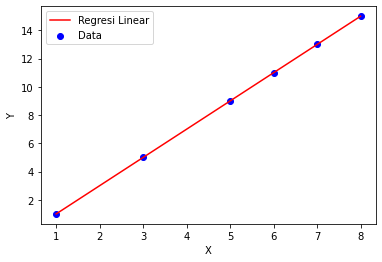

In [3]:
# Plot Nilai Data
x_max = np.max(X_train)
x_min = np.min(X_train)

# Garis Regresi
x = np.linspace(x_min, x_max, 1000)
y = b_0 + b_1 * x

# Plott Garis Regresi
plt.plot(x, y, color='red', label='Regresi Linear')

# Plot Titik Data
plt.scatter(X_train, y_train, color='blue', label='Data')

# Label sumbu
plt.xlabel('X')

# Label sumbu y
plt.ylabel('Y')

# Menampilkan Legenda
plt.legend()

# Menampilkan Gambar Hasil Plot
plt.show()

##Implementasi Model Regresi Linear Pada Data Real
Kita akan menggunakan dataset yang berisi ukuran kepala dan berat organ otak.

In [12]:
dataset = pd.read_csv('https://raw.githubusercontent.com/jokoeliyanto/Channel-Hobi-Data/main/Model%20Machine%20Learning%20dari%20Dasar(From%20Scratch)%20Python/Dataset/dataset_regresi_linear.csv')
# Melihat ukuran dataset
print(dataset.shape)
# Menampilkan 5 data teratas
dataset.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [13]:
#Mencari hubungan antara data X(Ukuran Kepala) dan Y(Berat Organ Otak)

# Definisikan Variabel Input(X) dan Output(Y)
X = dataset['Head Size(cm^3)'].values.reshape(-1,1)
Y = dataset['Brain Weight(grams)'].values.reshape(-1,1)

In [14]:
# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [15]:
# Proses Training Model

# Menghitung rata-rata inputs and outputs
x_rata2 = np.mean(X_train)
y_rata2 = np.mean(y_train)

# Jumlah data
n = len(X_train)

# Menuliskan formula untuk menghitung beta 0 dan beta 1
A = 0
B = 0
for i in range(n):
  A += (X_train[i] - x_rata2) * (y_train[i] - y_rata2)
  B += (X_train[i] - x_rata2) ** 2

b_1 = A / B
b_0 = y_rata2 - (b_1 * x_rata2)

# Menampilkan Koefisien Regresi Linear
print(b_0, b_1)

[334.26127335] [0.26106902]


Dalam notasi matematika, hasil ini dapat ditulis sebagai berikut:

Brain weights = 334.26127335 + 0.26106902 * Head size

Sekarang kita memiliki model linier. Mari kita plot secara grafis.

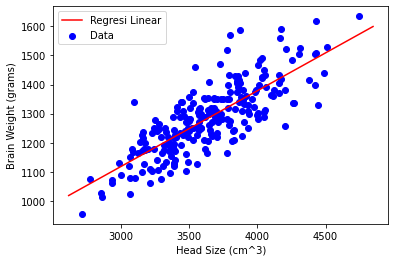

In [16]:
# Plot Nilai Data
x_max = np.max(X) + 100
x_min = np.min(X) - 100

# Garis Regresi
x = np.linspace(x_min, x_max, 1000)
y = b_0 + b_1 * x

# Plott Garis Regresi
plt.plot(x, y, color='red', label='Regresi Linear')

# Plot Titik Data
plt.scatter(X, Y, color='blue', label='Data')

# Label sumbu
plt.xlabel('Head Size (cm^3)')

# Label sumbu y
plt.ylabel('Brain Weight (grams)')

# Menampilkan Legenda
plt.legend()

# Menampilkan Gambar Hasil Plot
plt.show()

##Evaluasi Model
Kita perlu mengukur tingkat ketepatan(akurasi) model yang telah diperoleh. Terdapat banyak metode untuk
melakukan hal ini, namun pada artikel ini kita memilih menggunakan Root Mean Square Error dan Koefisien
Determinasi (R Skor)

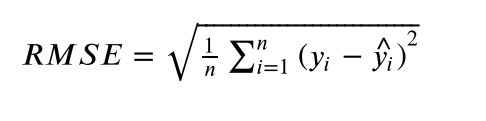

yi(topi) adalah nilai hasil prediksi ke-i. berikut penulisan rmse

In [17]:
rmse = 0
for i in range(len(X_test)):
  y_pred= b_0 + b_1* X_test[i]
  rmse += (y_test[i] - y_pred) ** 2
  
rmse = np.sqrt(rmse/n)
print(rmse)

[36.34269155]


Selanjutnya, mari kita hitung nilai skor untuk mengukur tingkat akurasi dari model linear yang diperoleh,
secara matematis dituliskan sebagai berikut:

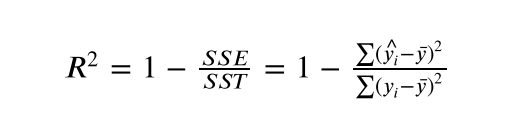

SSE adalah jumlah kuadrat galat sedangkan SST jumlah kuadrat total.

R^2 skor biasanya memiliki nilai antara 0 hingga 1. Nilai ini juga bisa bernilai negatif jika model regresi benar-
benar salah. Di bawah ini adalah kode pemrograman untuk menghitung R^2 skor

In [19]:
SST = 0
SSE = 0
y_pred= b_0 + b_1*X_test
y_rata2 = np.mean(y_test)
for i in range(len(X_test)) :
  SST += (y_test[i] - y_rata2) ** 2
  SSE += (y_test[i] - y_pred[i]) **2
  
score = 1- (SSE/SST)
print("Koefisien Determinasi:", score)

Koefisien Determinasi: [0.63763642]
